In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re as re

In [2]:
def plot_class(train) :
    print("*****************************")
    print("PCLASS VS SURVIVED")
    print("*****************************")
    # PClass
    print(train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())
    
    # Draw plot
    draw_bar_plot(train['Pclass'], train['Survived'])
    return train

In [3]:
def plot_gender(train) :
    print("*****************************")
    print("SEX VS SURVIVED")
    print("*****************************")
    #Gender
    print(train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean())
    
    # Draw plot
    draw_bar_plot(train['Sex'], train['Survived'])
    return train

In [4]:
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

In [5]:
def plot_title(train, full_data) :
    for dataset in full_data:
        dataset['Title'] = dataset['Name'].apply(get_title)

    # Name
    # Check title belong to which gender
    print("*****************************")
    print(pd.crosstab(train['Title'], train['Sex']))
    print("*****************************")
    
    # Limit Categorization of data as per gender, from above result
    for dataset in full_data:
        dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
         'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
        dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
        dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
        dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs') 
    
    print("*****************************")
    print("TITLE VS SURVIVED")
    print("*****************************")
    train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

    # Draw plot
    draw_bar_plot(train['Title'], train['Survived'])
    return train, full_data

In [6]:
def plot_categorical_age(train, full_data) :
    # Convert  age in five categorical range and add to dataset as column CategoricalAge
    for dataset in full_data:
        age_avg  = dataset['Age'].mean()
        age_std  = dataset['Age'].std()
        age_null_count = dataset['Age'].isnull().count()
    
        # null is replaced by random nos generated between mean +- stdev
        age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
        dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
        dataset['Age'] = dataset['Age'].astype(int)
    
    train['CategoricalAge'] = pd.cut(train['Age'], 5)
    print("*****************************")
    print("CATEGORICAL AGE VS SURVIVED")
    print("*****************************")
    print (train[['CategoricalAge', 'Survived']].groupby(['CategoricalAge'], as_index=False).mean())
    
    # Draw plot
    draw_bar_plot(train['CategoricalAge'], train['Survived'])
    return train, full_data

In [7]:
def plot_family_size(train, full_data) :
    print("*****************************")
    print("FAMILY SIZE VS SURVIVED")
    print("*****************************")
    #Family Size 
    for dataset in full_data:
        dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    print (train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())
    # Draw plot
    draw_bar_plot(train['FamilySize'], train['Survived'])
    return train, full_data

In [8]:
def plot_is_alone(train, full_data) :
    print("*****************************")
    print("IS ALONE VS SURVIVED")
    print("*****************************")
    #IsAlone is 1 if FamilySize = 1
    for dataset in full_data:
        dataset['IsAlone'] = 0
        dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    print (train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())
    # Draw plot
    draw_bar_plot(train['IsAlone'], train['Survived'])
    return train, full_data

In [9]:
def plot_embarked(train, full_data) :
    print("*****************************")
    print("EMBARKED VS SURVIVED")
    print("*****************************")
    #Check Maximum  occurence of Embarked value
    from collections import Counter
    print("Occurence: ",Counter(train['Embarked']))
    # Fill Nan of embarked with S which has maximum occurence in dataset
    for dataset in full_data:
        dataset['Embarked'] = dataset['Embarked'].fillna('S')
    print (train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean())
    # Draw plot
    draw_bar_plot(train['Embarked'], train['Survived'])
    return train, full_data

In [10]:
def plot_fare(train, full_data) :
    print("*****************************")
    print("FARE VS SURVIVED")
    print("*****************************")
    # Fare
    # Replace missing values with meadian for Fare
    # Convert into 4 bins
    for dataset in full_data:
        dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())
    train['CategoricalFare'] = pd.cut(train['Fare'], 4)
    print (train[['CategoricalFare', 'Survived']].groupby(['CategoricalFare'], as_index=False).mean())
    # Draw plot
    draw_bar_plot(train['CategoricalFare'], train['Survived'])
    return train, full_data

In [11]:
def draw_bar_plot(x, y) :
    plt.figure(figsize=(10,10)) 
    splot = sns.barplot(x, y);

    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
            xytext = (0, 10), textcoords = 'offset points', color = 'green')
    plt.show()    

In [12]:
def main() :
    # Import dataset
    train = pd.read_csv('../data/train.csv', header = 0, dtype={'Age': np.float64})
    test  = pd.read_csv('../data/test.csv' , header = 0, dtype={'Age': np.float64})
    full_data = [train, test]
    print("*****************************")
    print("Training dataset Info")
    print("*****************************")
    print (train.info())
    print("*****************************")
    print("Training dataset head")
    print("*****************************")
    print(train.head())
    train = plot_class(train)
    
    train = plot_gender(train)
    
    train, full_data = plot_title(train, full_data)
    
    train, full_data = plot_categorical_age(train, full_data)
    
    train, full_data = plot_family_size(train, full_data)
    
    train, full_data = plot_is_alone(train, full_data)
    
    train, full_data = plot_embarked(train, full_data)
    
    train, full_data = plot_fare(train, full_data)

*****************************
Training dataset Info
*****************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
*****************************
Training dataset head
*****************************
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                             

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


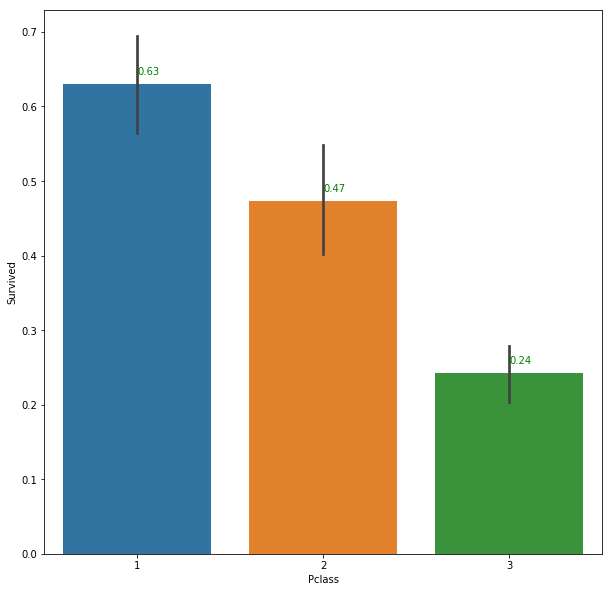

*****************************
SEX VS SURVIVED
*****************************
      Sex  Survived
0  female  0.742038
1    male  0.188908


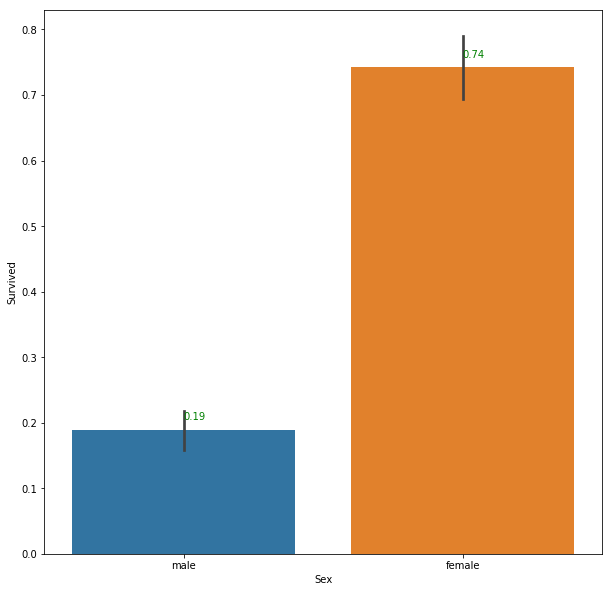

*****************************
Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1
*****************************
*****************************
TITLE VS SURVIVED
*****************************


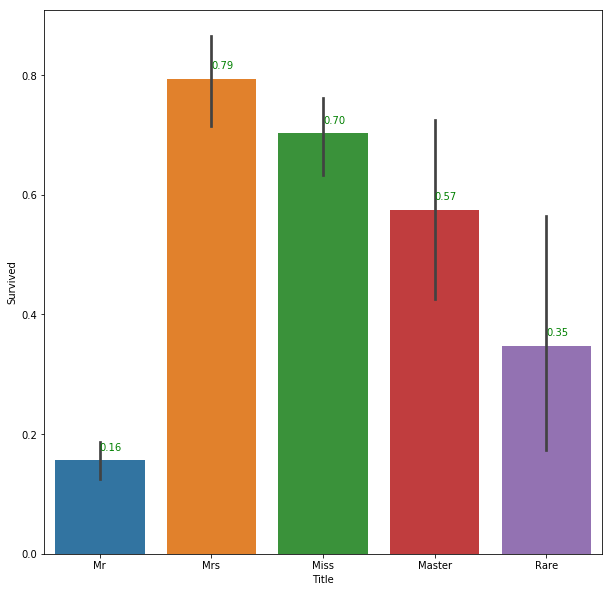

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


*****************************
CATEGORICAL AGE VS SURVIVED
*****************************
  CategoricalAge  Survived
0  (-0.08, 16.0]  0.564103
1   (16.0, 32.0]  0.343115
2   (32.0, 48.0]  0.370518
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


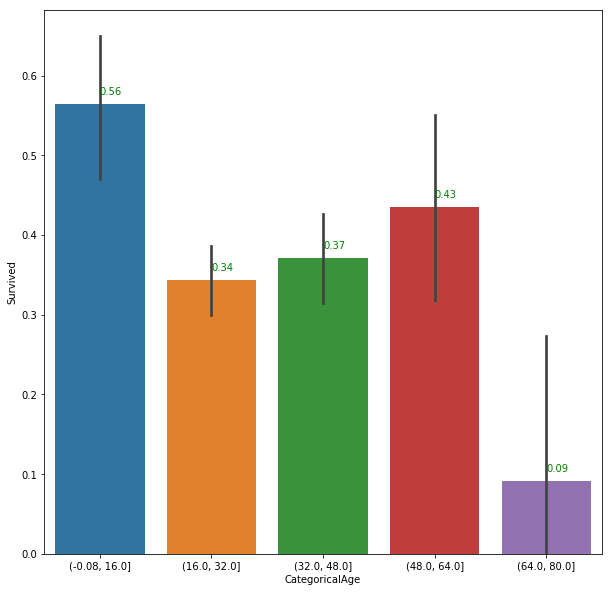

*****************************
FAMILY SIZE VS SURVIVED
*****************************
   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


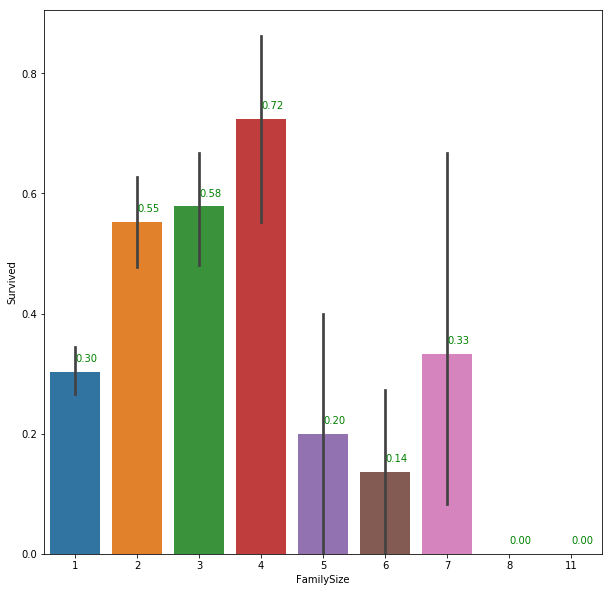

*****************************
IS ALONE VS SURVIVED
*****************************
   IsAlone  Survived
0        0  0.505650
1        1  0.303538


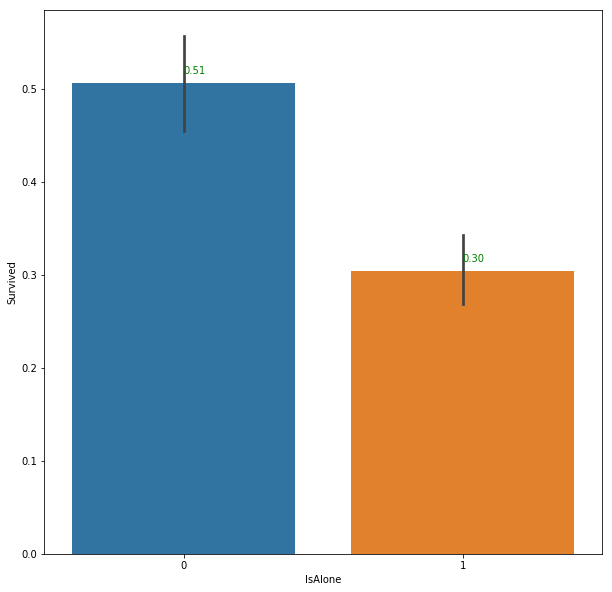

*****************************
EMBARKED VS SURVIVED
*****************************
Occurence:  Counter({'S': 644, 'C': 168, 'Q': 77, nan: 2})
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009


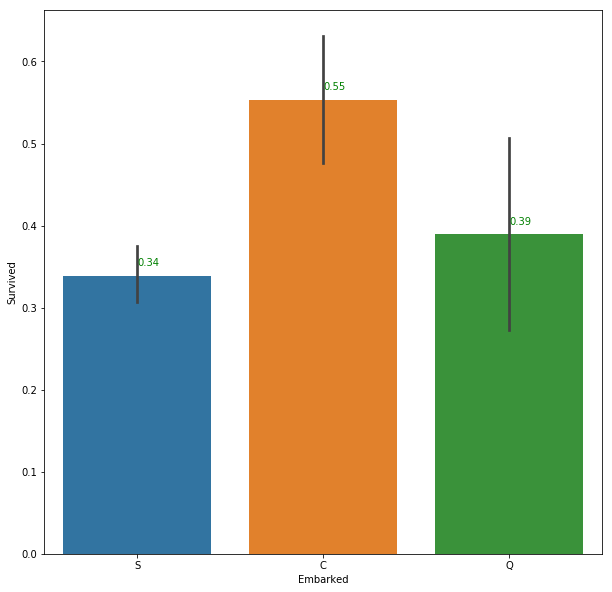

*****************************
FARE VS SURVIVED
*****************************
      CategoricalFare  Survived
0   (-0.512, 128.082]  0.368113
1  (128.082, 256.165]  0.724138
2  (256.165, 384.247]  0.666667
3  (384.247, 512.329]  1.000000


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


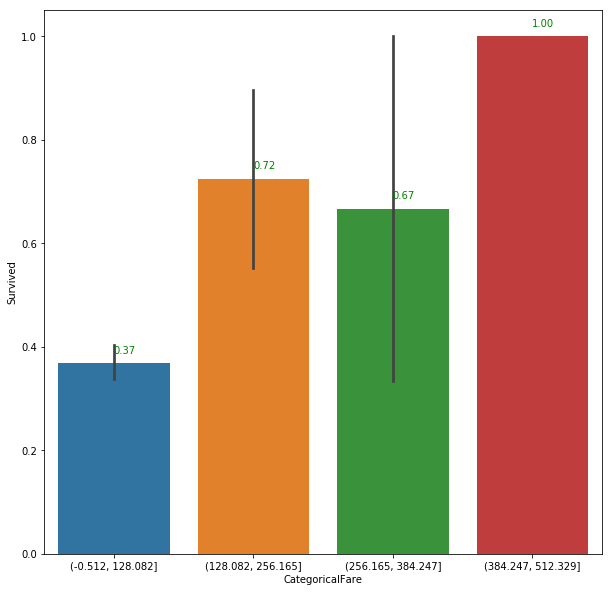

In [13]:
# Invoke main method
main()